In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,20a14_00000,0,6179.101562,bald,1,1.618126e+06
1,1,20a14_00000,1,6386.493164,bald,1,1.618126e+06
2,2,20a14_00000,2,6594.872559,bald,1,1.618126e+06
3,3,20a14_00000,3,6386.395020,bald,1,1.618126e+06
4,4,20a14_00000,4,6641.838867,bald,1,1.618126e+06
...,...,...,...,...,...,...,...
6770,6770,20a14_00024,266,5993.926758,random,5,1.621297e+06
6771,6771,20a14_00024,267,5993.586914,random,5,1.621297e+06
6772,6772,20a14_00024,268,5999.790039,random,5,1.621297e+06
6773,6773,20a14_00024,269,5991.021484,random,5,1.621297e+06


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
5420,5420,20a14_00020,0,6179.101562,random,1,1.534193e+06
5421,5421,20a14_00020,1,5996.438477,random,1,1.534193e+06
5422,5422,20a14_00020,2,6199.227539,random,1,1.534193e+06
5423,5423,20a14_00020,3,6052.218262,random,1,1.534193e+06
5424,5424,20a14_00020,4,6220.133789,random,1,1.534193e+06
...,...,...,...,...,...,...,...
6770,6770,20a14_00024,266,5993.926758,random,5,1.621297e+06
6771,6771,20a14_00024,267,5993.586914,random,5,1.621297e+06
6772,6772,20a14_00024,268,5999.790039,random,5,1.621297e+06
6773,6773,20a14_00024,269,5991.021484,random,5,1.621297e+06


In [4]:
def format_scientific_tight(value):
    """
    Formats a number using scientific notation without the + sign.
    """
    return f"{value:.1e}".replace('e+0', 'e').replace('e+', 'e')

In [5]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{format_scientific_tight(row.avg)} ± {format_scientific_tight(row.stdv)}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_38842/3981228595.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


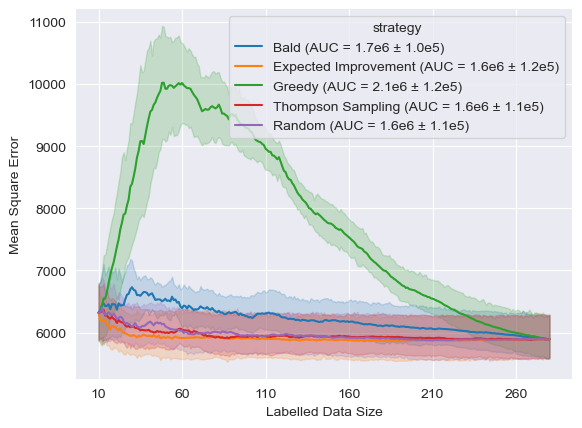

In [6]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)